# Practical Application 3

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## CRISP-DM Phase 1: Business Understanding

In today's highly competitive banking industry, effective marketing campaigns are crucial for attracting and retaining customers. The business objective in this assignment is to improve the marketing campaigns of a Portuguese banking institution by predicting whether a client will subscribe to a term deposit. This predictive model will help the bank to target the right customers, thereby increasing the effectiveness of marketing efforts and optimizing resource allocation.


![image.png](CRISP-DM.png)

We apply the CRISP-DM (Cross-Industry Standard Process for Data Mining) model to analyze a dataset from a Portuguese banking institution.

## CRISP-DM Phase 2: Data Understanding

The dataset contains the results of various marketing campaigns conducted over the phone, targeting potential customers for term deposits. By leveraging machine learning classifiers, we aim to predict the success of future marketing campaigns and determine which model performs best in this context.

In [11]:
# Load dataset
df = pd.read_csv(r'data\bank-additional-full.csv', sep = ';')

# Display first few rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


As seen, the dataset includes attributes related to the client, the contact, and the economic context. 

- Client data includes attributes like age, job, marital status, and education.
- Contact data includes attributes like contact communication type, last contact month, and day of the week.
- Economic context includes attributes like employment variation rate, consumer price index, and euribor 3 month rate.



## CRISP-DM Phase 3: Data Preparation

In this phase, we will clean the data, handle missing values, encode categorical variables, and standardize numerical features.

#### Handling Missing Values:

We will replace 'unknown' values with NaN and then drop rows with any missing values to ensure a clean dataset.

In [14]:
# Handle missing values
df = df.replace('unknown', np.nan)
df.dropna(inplace=True)

#### Encoding Categorical Variables:

We will convert categorical variables into numerical values using label encoding.


In [15]:
# Encode categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])


#### Ensuring there are no missing values

In [20]:
#checking missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Dropping Irrelevant Features:

We will drop the 'duration' feature because it is not known before a call is performed and highly affects the target variable.


In [23]:
# Drop the 'duration' feature
df = df.drop(columns=['duration'])

#### Standardizing Numerical Features:

We will standardize numerical features to ensure they contribute equally to the analysis.

In [25]:
# First, we split dataset into features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Standardize numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## CRISP-DM Phase 4: Modeling

We will initialize and train four classifiers: k-nearest neighbors, logistic regression, decision trees, and support vector machines. After training, we will make predictions on the test set.

### Classifiers to be Used:
1. K-Nearest Neighbors (KNN)
2. Logistic Regression
3. Decision Tree
4. Support Vector Machine (SVM)


In [28]:
# Initialize classifiers
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
svc = SVC()

# Train classifiers
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)
logreg_pred = logreg.predict(X_test)
dtree_pred = dtree.predict(X_test)
svc_pred = svc.predict(X_test)


## CRISP-DM Phase 5: Evaluation

### Metrics to be Evaluated:
1. Accuracy Score
2. Precision
3. Recall
4. F1-Score
5. Confusion Matrix
6. Classification Report


In [31]:
# Evaluate classifiers
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

knn_metrics = [accuracy_score(y_test, knn_pred),
               precision_score(y_test, knn_pred),
               recall_score(y_test, knn_pred),
               f1_score(y_test, knn_pred)]

logreg_metrics = [accuracy_score(y_test, logreg_pred),
                  precision_score(y_test, logreg_pred),
                  recall_score(y_test, logreg_pred),
                  f1_score(y_test, logreg_pred)]

dtree_metrics = [accuracy_score(y_test, dtree_pred),
                 precision_score(y_test, dtree_pred),
                 recall_score(y_test, dtree_pred),
                 f1_score(y_test, dtree_pred)]

svc_metrics = [accuracy_score(y_test, svc_pred),
               precision_score(y_test, svc_pred),
               recall_score(y_test, svc_pred),
               f1_score(y_test, svc_pred)]

results = pd.DataFrame({
    'Classifier': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [knn_metrics[0], logreg_metrics[0], dtree_metrics[0], svc_metrics[0]],
    'Precision': [knn_metrics[1], logreg_metrics[1], dtree_metrics[1], svc_metrics[1]],
    'Recall': [knn_metrics[2], logreg_metrics[2], dtree_metrics[2], svc_metrics[2]],
    'F1-Score': [knn_metrics[3], logreg_metrics[3], dtree_metrics[3], svc_metrics[3]]
})

# Confusion Matrix and Classification Report
for clf, pred in zip(['KNN', 'Logistic Regression', 'Decision Tree', 'SVM'], [knn_pred, logreg_pred, dtree_pred, svc_pred]):
    print(f"\nClassifier: {clf}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("Classification Report:")
    print(classification_report(y_test, pred))


Classifier: KNN
Confusion Matrix:
[[7664  310]
 [ 828  345]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7974
           1       0.53      0.29      0.38      1173

    accuracy                           0.88      9147
   macro avg       0.71      0.63      0.65      9147
weighted avg       0.85      0.88      0.86      9147


Classifier: Logistic Regression
Confusion Matrix:
[[7854  120]
 [ 909  264]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7974
           1       0.69      0.23      0.34      1173

    accuracy                           0.89      9147
   macro avg       0.79      0.61      0.64      9147
weighted avg       0.87      0.89      0.86      9147


Classifier: Decision Tree
Confusion Matrix:
[[7072  902]
 [ 736  437]]
Classification Report:
              precision    recall  f1-score   support

          

## CRISP-DM Phase 6: Deployment

Based on the performance metrics evaluated, we can draw several insights regarding the effectiveness of different classifiers in predicting the success of bank marketing campaigns. Below is a visualization of each classifier's performance:

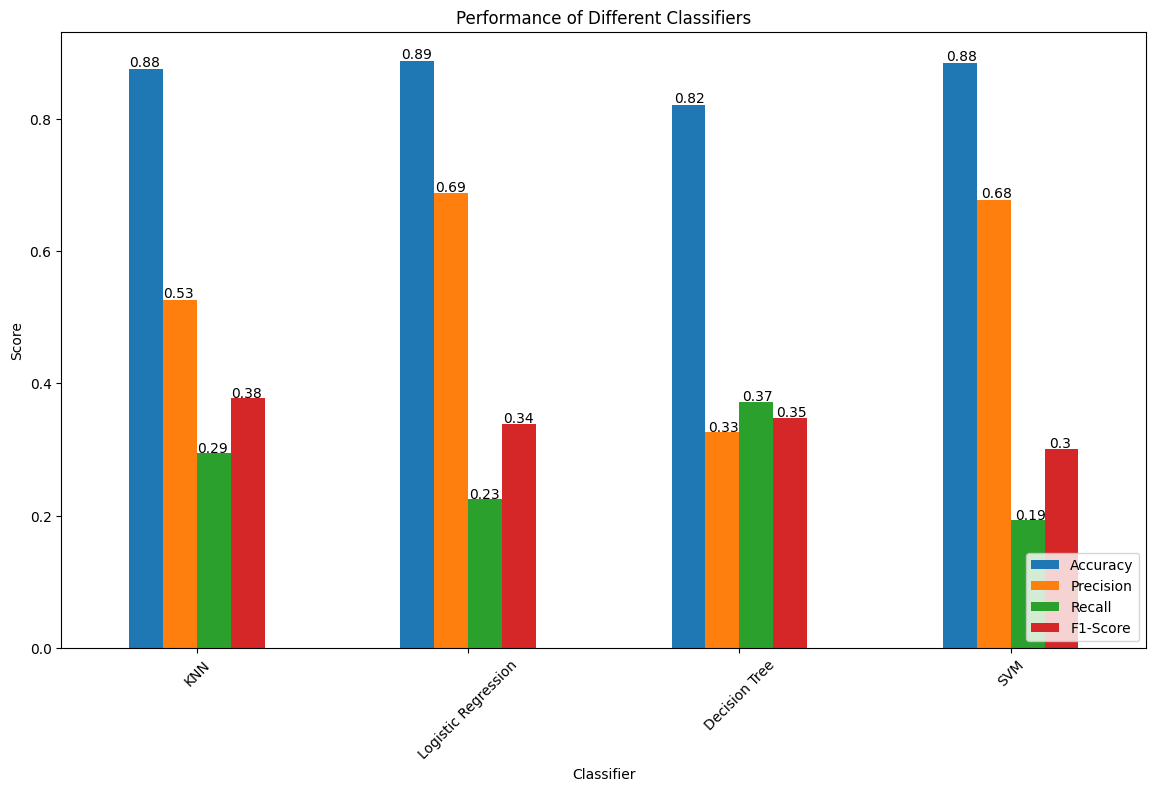

In [33]:
# Plot the results
ax = results.set_index('Classifier').plot(kind='bar', figsize=(14, 8))
plt.title('Performance of Different Classifiers')
plt.ylabel('Score')
plt.xlabel('Classifier')
plt.xticks(rotation=45)
plt.legend(loc='lower right')

# Annotate the bars with the metric values
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


#### Key Takeaways:

- KNN achieved a high overall accuracy of 88%, with good precision for class 0 (no subscription). However, its recall and F1-score for class 1 (subscription) are relatively low, indicating that it struggles to identify positive cases accurately.

- Logistic Regression provides the highest accuracy (89%) among the classifiers. It shows excellent precision for class 1 but low recall, indicating it correctly identifies a high proportion of actual positives but misses many.

- Decision Tree offers a balance between precision and recall for class 1 but overall has the lowest accuracy (82%) among the classifiers. It is more interpretable, which can be useful for understanding the decision-making process.

- SVM achieves high accuracy (88%) and precision for class 1 but has the lowest recall, indicating it identifies fewer actual positives. This suggests it is conservative in predicting positive cases.


#### Recommendations:
1. **Targeted Campaigns:** Use Logistic Regression for its high accuracy and precision to identify potential customers for targeted marketing campaigns.
2. **Interpretable Models:** Utilize Decision Trees to understand the decision-making process and identify key factors influencing customer decisions.
3. **Conservative Predictions:** For conservative predictions, consider SVM, but focus on improving its recall through further tuning and feature selection.
